<a href="https://colab.research.google.com/github/dpiponi/colabs/blob/main/Trapezium_rule_with_complex_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

I want to integrate $f$ using the trapezium rule.

In [ ]:
def g(x):
  return 200 * x + 400 * x**2
def f(x):
  return np.exp(1j * g(x))

But as you can see, $f$ is highly oscillatory.

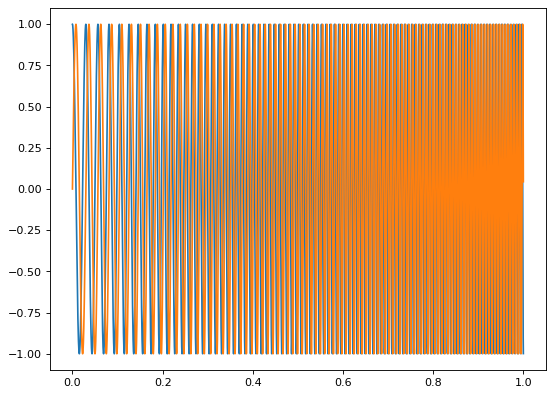

In [ ]:
x = np.linspace(0, 1, 10000)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, np.real(f(x)))
plt.plot(x, np.imag(f(x)))

Using Mathematica here's an "exact" value for the integral

In [ ]:
exact = 1/40 * (-1+0j)**(3/4) * np.exp(-25*1j) * np.sqrt(np.pi) * (
    scipy.special.erfi(5 * (-1 + 0j)**(1/4)) - scipy.special.erfi(25 * (-1 + 0j)**(1/4)))
print(exact)

(0.00014439590639143051+0.005993067119836155j)


Here's the trapezium rule

In [ ]:
def trapezium(x, f):
  fx = f(x)
  return np.sum(0.5 * (fx[1:] + fx[: -1]) * (x[1:] - x[: -1]))

We try 100 points first

In [ ]:
n = 100
x = np.linspace(0., 1., n + 1)
r = trapezium(x, f)
r, np.abs(r - exact)

((0.06313631311353836-0.06045428442835751j), 0.09155999214286385)

It's terrible. We need a lot more points to sample our function well.

In [ ]:
n = 1500
x = np.linspace(0., 1., n + 1)
r = trapezium(x, f)
r, np.abs(r - exact)

((0.000142746454901395+0.005948379663873063j), 4.471788692091036e-05)

Instead I want to integrate with a set of points in the complex plane. I'm going to use a $\sin$ function to define a path that swings away from the real line at the start and swings back at the end. But I also want it to go faster at the ends so there's more resolution during the bits that still oscillate. I'm just going to make up a suitable function. (Sort of how you make up functions when writing shaders.)

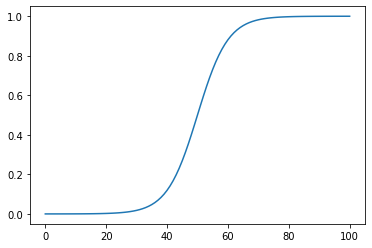

In [ ]:
def slowAtEnds1(x):
  return np.tanh(10 * (x - 0.5))

def slowAtEnds(x):
  return (slowAtEnds1(x) - slowAtEnds1(0)) / (slowAtEnds1(1) - slowAtEnds1(0))

n = 100
x = np.linspace(0., 1., n + 1)

plt.plot(slowAtEnds(x))

Here are our points

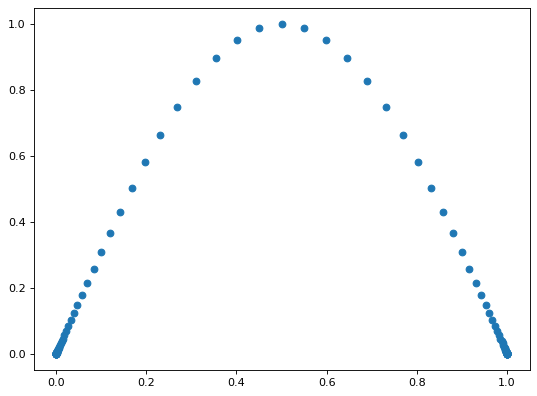

In [ ]:
n = 100
def contour(i):
  t = slowAtEnds(i / n)
  return t + 1j * np.sin(np.pi * t)  # the `sin` is the swing mentioned above
i = np.arange(n + 1)
x = contour(i)
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(np.real(x), np.imag(x))

Here's what $f$ looks like at those points. Much smoother!

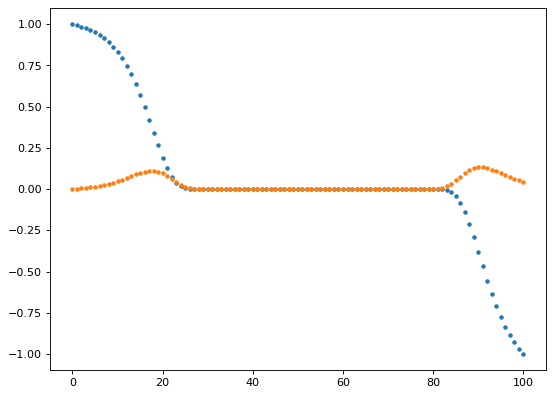

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.real(f(x)), '.')
plt.plot(np.imag(f(x)), '.')

And now we get a good result with fewer points. Amazingly the trapezium rule works absolutely fine without modification in the complex plane.

In [ ]:
r = trapezium(x, f)
r, np.abs(r - exact)

((0.0001454452378925464+0.006034772427720067j), 4.171850671214253e-05)

This method works if
1. you can find an alternative path that avoids oscillations (which can be hard, avoiding wild patches is a bit like sailing between Scylla and Charybdis sometimes)
2. your integrand is analytic in the region between the original integration path and the new one

If the function is complicated you can use a trick like one step of gradient descent to deform your contour in a direction that has less oscillation. I do that here: https://github.com/dpiponi/caustics

I hope one day to use this method to do simple ray-tracing with diffraction effects

See also https://en.wikipedia.org/wiki/Method_of_steepest_descent